In [160]:
import numpy as np
import matplotlib.pyplot as plt

In [161]:
def hypothetical_classifier(targets, prob_correct):
    """
    A simple binary classifier that take in targetss
    and returns correct low confidence scores.
    
    :param targets: The input targets (0 or 1).
    :return: A tuple of (targets, confidence_score), where confidence_score is close to 0.5.
    """
    num_inputs = len(targets)
    indices = np.random.uniform(0, 1, num_inputs) > prob_correct
    targets = np.array(targets)
    targets[indices] = 1 - targets[indices]
    
    estimated_probabilities = np.zeros((num_inputs, 2))
    # CP does not assume distribution. Uniform distribution is selected for conveninetcy.
    estimated_probabilities[range(num_inputs), targets] = 0.55 + np.random.uniform(-0.04, 0.05, num_inputs) 
    estimated_probabilities[range(num_inputs), 1 - targets] = 1 - estimated_probabilities[range(num_inputs), targets]
    return estimated_probabilities

# Least Ambiguous set-valued Classifier (LAC)

## LAC on Model with 100% accuracy but underconfidence 

The classifier will have 100% accuracy with low confidence.

In [162]:
y_true = [0, 1, 1, 0, 1, 0, 0, 0]
y_pred = hypothetical_classifier(targets=y_true, prob_correct=1) # y_pred = y_hat
y_pred

array([[0.51189313, 0.48810687],
       [0.40983652, 0.59016348],
       [0.48709209, 0.51290791],
       [0.54743299, 0.45256701],
       [0.46256062, 0.53743938],
       [0.53123787, 0.46876213],
       [0.55410661, 0.44589339],
       [0.55503691, 0.44496309]])

### Overview of LAC

let set $\alpha=0.05$ expcting coverage = 0.95. We will ignore the finite-sampling correction in this example.

In [179]:
ALPHA = 0.05
prob_correct = 1

let generate some targets and measure accuracy.

In [187]:
cal_targets = [0]*200 + [1]*200
cal_pred = hypothetical_classifier(cal_targets, 0.9)

nonconformity_scores = cal_pred[range(len(cal_targets)), cal_targets] # confidence on correct label
qhat = np.quantile(nonconformity_scores, q=ALPHA)
est_prob_inv = 1 - nonconformity_scores # estimated probabilities of the incorrect classes

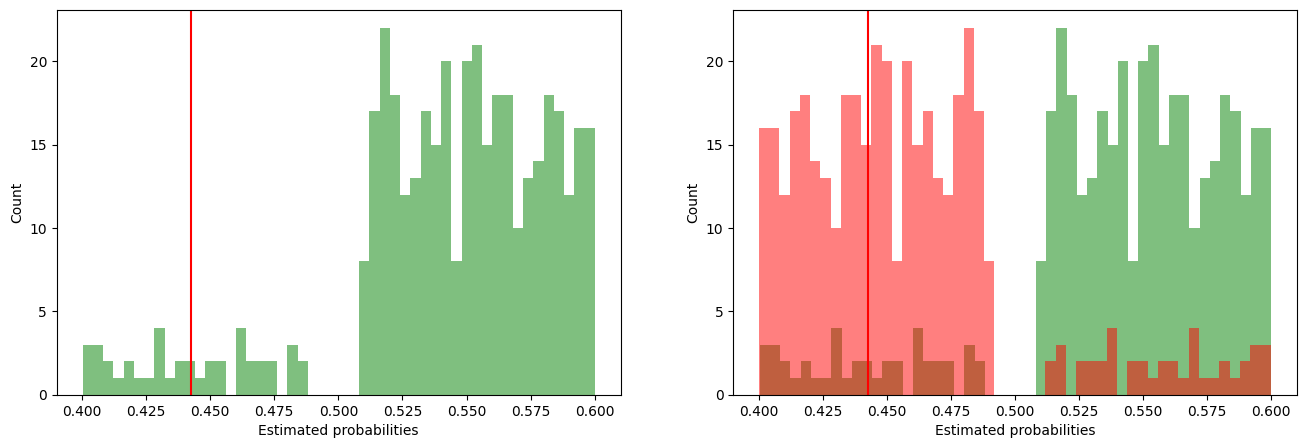

In [189]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.hist(nonconformity_scores, bins=50, color='g', alpha=0.5)
plt.axvline(qhat, c='r')
plt.ylabel("Count")
plt.xlabel("Estimated probabilities")

plt.subplot(1, 2, 2)
plt.hist(nonconformity_scores, bins=50, color='g', alpha=0.5)
plt.hist(est_prob_inv, bins=50, color='r', alpha=0.5)
plt.axvline(qhat, c='r')
plt.ylabel("Count")
plt.xlabel("Estimated probabilities")
plt.show()

In [172]:
cal_conformal_pred = cal_pred > qhat # inference
qhat

0.514312971081766

evaluate on calibration set

In [139]:
# accuracy
correct_prediction = np.equal(cal_pred.argmax(axis=1), cal_targets)
accuracy = correct_prediction.sum() / len(cal_targets)

# coverage
coverage = cal_conformal_pred[range(len(cal_targets)), cal_targets]
coverage = coverage.sum() / len(cal_targets)

print("The hypothetical model has the accuracy of {}".format(accuracy))
print("The hypothetical model has the coverage of {}".format(coverage))

The hypothetical model has the accuracy of 0.81
The hypothetical model has the coverage of 0.95


### repeat the same thing step by step

In [140]:
cal_targets = [0]*500 + [1]*500
cal_pred = hypothetical_classifier(cal_targets, 1)

let plot nonconformity measure and the quantile. If confidence of new prediction is higher than the quantile, we include it in prediction set. 

Since we are taking quantile at $\alpha$, this will reject correct prediction $\alpha$ of the time and accept the correct prediction $1-\alpha$ of the time achieving coverage.

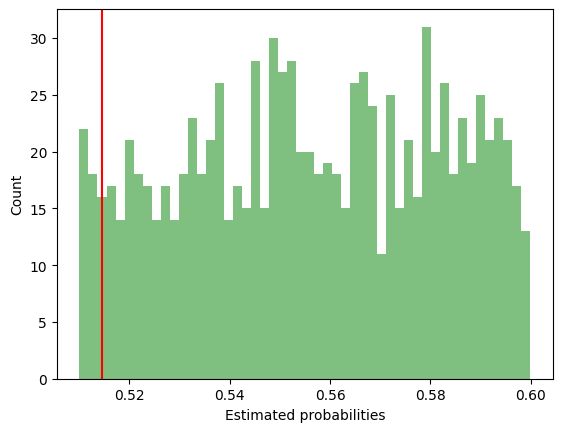

In [141]:
nonconformity_scores = cal_pred[range(len(cal_targets)), cal_targets] # confidence on correct label
qhat = np.quantile(nonconformity_scores, q=ALPHA)

plt.hist(nonconformity_scores, bins=50, color='g', alpha=0.5)
plt.axvline(qhat, c='r')
plt.ylabel("Count")
plt.xlabel("Estimated probabilities")
plt.show()

Also, in this case, the prediction set never include the wrong prediction since estimated probabilities of incorrect class is always lower than the quantile.

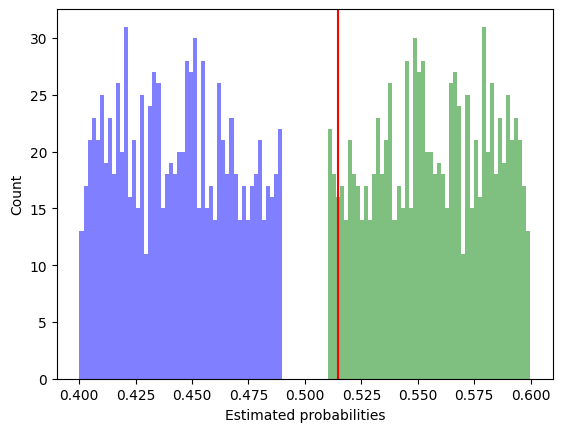

In [142]:
est_prob_inv = 1 - nonconformity_scores # estimated probabilities of the incorrect classes

plt.hist(nonconformity_scores, bins=50, color='g', alpha=0.5)
plt.hist(est_prob_inv, bins=50, color='b', alpha=0.5)
plt.axvline(qhat, c='r')
plt.ylabel("Count")
plt.xlabel("Estimated probabilities")
plt.show()

Drawing model's confidences from the same distribution. We will keep getting 95% coverage.

## LAC on Model with 0% accuracy and overconfidence 

In [143]:
ALPHA = 0.05

In [144]:
cal_targets = [0]*100 + [1]*100
cal_pred = hypothetical_classifier(cal_targets, 0)

In [145]:
nonconformity_scores = cal_pred[range(len(cal_targets)), cal_targets] # confidence on correct label
qhat = np.quantile(nonconformity_scores, q=ALPHA)
cal_conformal_pred = cal_pred > qhat # inference
qhat

0.4034263280902881

In [146]:
# accuracy
correct_prediction = np.equal(cal_pred.argmax(axis=1), cal_targets)
accuracy = correct_prediction.sum() / len(cal_targets)

# coverage
coverage = cal_conformal_pred[range(len(cal_targets)), cal_targets]
coverage = coverage.sum() / len(cal_targets)

print(accuracy)
print(coverage)

0.0
0.95
